# Spectral Clustering
k-means clustering partitions n observations into k clusters in which each observation belongs to the cluster with the nearest mean. The algoritm doesn't work if clusters are separated by nonlinear boundaries.
In Spectral Clustering each observation belongs to the cluster to which is better connected. The relationship between data points is rapressented by a graph, each edge is weighted by a similarity metric, the best partitions are the ones where the weights that connect different clusters are as small as possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_excel('../Datasets/Circles.xls')

## Explore the dataset

In [3]:
df.head()

,x1,x2,y
0,0.846650,0.487330,0
1,-1.038498,-0.274275,0
2,1.036908,-0.384525,0
3,-0.584862,0.996709,0
4,1.033636,0.373811,0


In [4]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,-0.000940,0.001201,0.50000
std,0.522123,0.523933,0.50025
min,-1.184377,-1.175856,0.00000
25%,-0.260947,-0.249323,0.00000
50%,0.009533,0.004013,0.50000
75%,0.245396,0.243363,1.00000
max,1.214431,1.255872,1.00000


In [5]:
df['y'].unique()

array([0, 1])

## Scale the features

In [6]:
X = scale(df[['x1','x2']])
#y = df['y']

## Plot the dataset

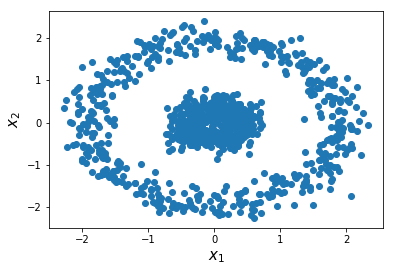

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('$x_2$',fontsize=15)
plt.show()

## K-Means Clustering

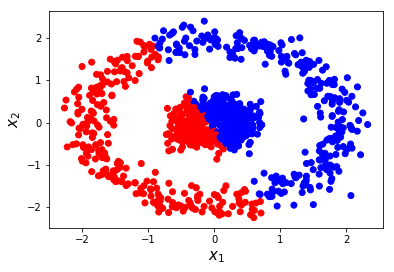

In [8]:
linear_model = KMeans(n_clusters=2,init='k-means++')
linear_model.fit(X)

color = pd.Series(linear_model.predict(X)).map({0:'red',1:'blue'})

plt.scatter(X[:,0],X[:,1],c=color)
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('$x_2$',fontsize=15)
plt.show()

## Spectral Clustering

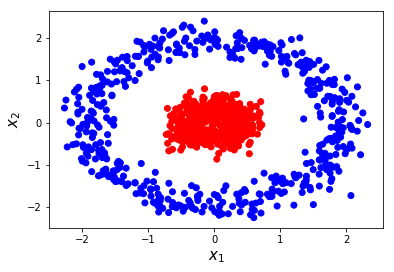

In [9]:
nl_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

color = pd.Series(nl_model.fit_predict(X)).map({0:'red',1:'blue'})

plt.scatter(X[:,0],X[:,1],c=color)
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('$x_2$',fontsize=15)
plt.show()